# DEFINE PROBLEM

- Many individuals sell used car below market price

# DEFINE GOALS

- Help individuals predict range car price, so they don't sell cars below market price
- Find factor that determine car price through EDA

### IMPORT COMMON PACKAGE

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### IMPORT FILE

In [2]:
df = pd.read_csv('Car details v3.csv')

### DATA TYPE OVERALL CHECK

In [3]:
pd.options.display.max_columns = 999

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


##### COLUMNS DESCRIPTION
`name` - Name of The Car\
`year` - Year of The Car Build\
`selling_price` - Price of each car sold\
`km_driven` - Distance Car in Kilometer \
`fuel` - Type Of Car Fuel Consumption\
`seller_type` - Type of Car Seller\
`transmission` - Type of Car Transmission\
`owner` - Type of Car Owner\
`mileage` - \
`engine` - Car Engine Capacity\
`max_power` - Car Engine Max Power\
`torque` - Car Engine Torque\
`seats` - Number of Seats in a Car

Source : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [5]:
print(df.shape)

(8128, 13)


### COLUMN SUMMARY

In [6]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,name,object,0,0.00,2058,"[Maruti Alto 800 VXI, Maruti Ciaz ZXi Plus]"
1,year,int64,0,0.00,29,"[2019, 1995]"
2,selling_price,int64,0,0.00,677,"[112999, 715000]"
3,km_driven,int64,0,0.00,921,"[91500, 280000]"
4,fuel,object,0,0.00,4,"[LPG, CNG]"
5,seller_type,object,0,0.00,3,"[Dealer, Trustmark Dealer]"
6,transmission,object,0,0.00,2,"[Manual, Automatic]"
7,owner,object,0,0.00,5,"[Test Drive Car, Third Owner]"
8,mileage,object,221,2.72,393,"[24.5 kmpl, 27.39 kmpl]"
9,engine,object,221,2.72,121,"[2362 CC, 1991 CC]"


In [8]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

## DATA PREPARATION BEFORE OUTLIERS & MISSING VALUE CHECKING

- Remove string on mileage, engine, and max power column
- Torque column will not be used

In [9]:
## Remove String on Mileage
df['mileage'] = df['mileage'].str[:-5]
df['mileage'] = df['mileage'].astype('float64')

In [10]:
## Remove String on Engine
df['engine'] = df['engine'].str[:4]
df['engine'] = df['engine'].astype('float64')

In [11]:
## Remove String on MaxPower
df['max_power'] = df['max_power'].str[:-4]
df['max_power'] = df['max_power'].replace('', )
df['max_power'] = df['max_power'].astype('float64')

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [12]:
round(df.describe(),2)
# Newest car sold is built in 2020
# Oldest car sold is built in 1983
# Most car sold is built in 2015
# Cheapest car sold is around 29999
# The most expensive car sold is 10000000
# Average price car sold is around 638271
# Maximum km_driven of car sold is 2360457 --> is that possible?
# Minimum km_driven of car sold is 1
# Average km_driven of car sold is 56550
# Maximum number of car seats is 14
# Minimum number of car seats is 2
# Minimum CarEngine Capacity sold is 624 cc
# Maximum Engine Capacity of the car sold is 3603 cc
# Median Engine Capacity of the car sold is 1248 cc
# Minimum Power of Car Engine sold is 32 HP
# Maximum Power of Car Engine Sold is 400 HP
# Median Power of Car Engine SOld is 82 HP

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.00,8128.00,8128.00,7907.00,7907.00,7913.00,7907.00
mean,2013.80,638271.81,69819.51,19.42,1458.63,91.58,5.42
std,4.04,806253.40,56550.55,4.04,503.92,35.74,0.96
min,1983.00,29999.00,1.00,0.00,624.00,32.80,2.00
25%,2011.00,254999.00,35000.00,16.78,1197.00,68.05,5.00
50%,2015.00,450000.00,60000.00,19.30,1248.00,82.00,5.00
75%,2017.00,675000.00,98000.00,22.32,1582.00,102.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00


### OUTLIERS CHECK & HANDLING

In [13]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00


In [15]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            
    return unique_list

In [16]:
outliers = []
cek_outlier(df['year'])
print(len(outliers))
unique(outliers)
## There are 81 car solds which 'year' are an outliers

81


[2001, 1999, 2000, 1983, 1996, 1994, 1995, 1998, 1997, 1991]

In [17]:
outliers = []
cek_outlier(df['selling_price'])
print('Jumlah Outliers selling_price: ', len(outliers))
print()
print('Unique Outliers selling_price: ', unique(outliers))
print()
print('Nilai Max Outliers Selling Price: ', max(outliers))
print()
print('Nilai Min Outliers Selling Price: ', min(outliers))
## There are 600 car which selling price are an outliers

Jumlah Outliers selling_price:  600

Unique Outliers selling_price:  [2100000, 1500000, 1450000, 1650000, 1750000, 1590000, 1689999, 1425000, 1700000, 2500000, 3975000, 5150000, 3200000, 4100000, 4500000, 6000000, 3790000, 2150000, 5800000, 1864999, 2700000, 3400000, 2650000, 5850000, 2625000, 2550000, 1525000, 1900000, 2900000, 10000000, 1380000, 4600000, 3000000, 1550000, 3800000, 2000000, 5400000, 5500000, 2475000, 1600000, 1800000, 1350000, 1625000, 1745000, 1325000, 3750000, 1400000, 1925000, 2940000, 1825000, 1576000, 1560000, 1950000, 3250000, 1575000, 1465000, 1460000, 2950000, 1675000, 1888000, 2280000, 2450000, 2825000, 2125000, 3350000, 2600000, 1594000, 1530000, 1850000, 2199000, 3600000, 2850000, 2800000, 3900000, 7200000, 1670000, 1390000, 4090000, 1475000, 1630000, 2711000, 1511000, 1515000, 1405000, 3100000, 1920000, 1365000, 1490000, 1680000, 5200000, 2375000, 2750000, 1385000, 1748999, 2064000, 6223000, 5923000, 6523000, 1757000, 4000000, 1898999, 3251000, 1938000, 35

In [18]:
df[df['selling_price']==10000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.00,400.00,640Nm@ 1740rpm,4.00


In [19]:
outliers = []
cek_outlier(df['km_driven'])
print(len(outliers))
unique(outliers)
## There are 170 car which km_driven are an outliers

170


[193000,
 207890,
 240000,
 214000,
 265000,
 250000,
 201850,
 221889,
 300000,
 200000,
 193623,
 219000,
 195000,
 360003,
 206000,
 210000,
 216000,
 227000,
 334000,
 217000,
 1500000,
 202000,
 205000,
 225000,
 375000,
 255000,
 380000,
 270000,
 230000,
 248000,
 218463,
 275000,
 220000,
 260000,
 198000,
 2360457,
 577414,
 500000,
 330000,
 291000,
 197000,
 246000,
 305000,
 212000,
 264000,
 298000,
 291977,
 248200,
 242000,
 218000,
 290000,
 475000,
 440000,
 200400,
 285000,
 231438,
 239451,
 426000,
 215000,
 200185,
 222300,
 370000,
 320000,
 271000,
 248119,
 376412,
 201000,
 280000,
 194000]

In [20]:
outliers = []
cek_outlier(df['mileage'])
print(len(outliers))
unique(outliers)

0


[]

In [21]:
outliers = []
cek_outlier(df['engine'])
print(len(outliers))
unique(outliers)

0


[]

In [22]:
outliers = []
cek_outlier(df['max_power'])
print(len(outliers))
unique(outliers)

0


[]

In [23]:
outliers = []
cek_outlier(df['seats'])
print(len(outliers))
unique(outliers)

0


[]

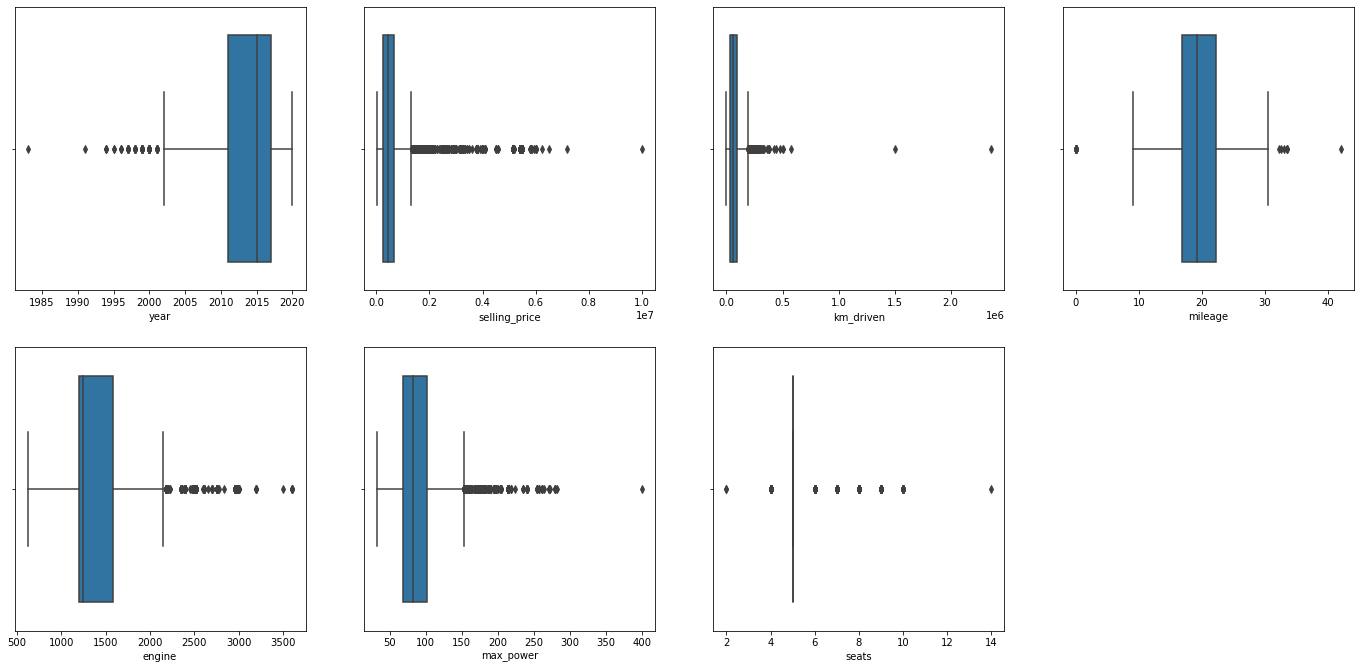

In [24]:
## Plot Boxplot For Numerical Columns to show distribution data & outliers value
df_outliers = df.drop(columns = ['name', 'fuel', 'seller_type','transmission', 'owner', 'torque'])

plt.figure(figsize =(24, 24))
x = 1 

for column in df_outliers.columns:
    plt.subplot(4,4,x)
    sns.boxplot(df_outliers[column])
    x+=1
    
plt.show()

- The data consist of many outliers. Outliers will not be removed since it might have correspondence to car pricing scheme

### MISSING VALUE CHECK & HANDLING

In [25]:
df.isna().sum()
## From information below, dataset have several missing value on milage, engine, max_power, torque, seats --> futher handling will be done

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [26]:
df['mileage'] = df['mileage'].fillna(df['mileage'].mean())

In [27]:
df['engine'] = df['engine'].fillna(df['engine'].mean())

In [28]:
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())

In [29]:
df['seats'] = df['seats'].fillna(df['seats'].median())

In [30]:
(221/8128) * 100
## 2.7% of NULL VALUE

2.718996062992126

In [31]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           222
seats              0
dtype: int64

# DATA PREPARATION - FEATURES ENGINEERING

### FEATURES ENGINEERING FOR EDA

In [32]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00


- Binning Car Price
- Binning km driven
- Binning Car Age 
- Binning Engine

#### Binning Car Price

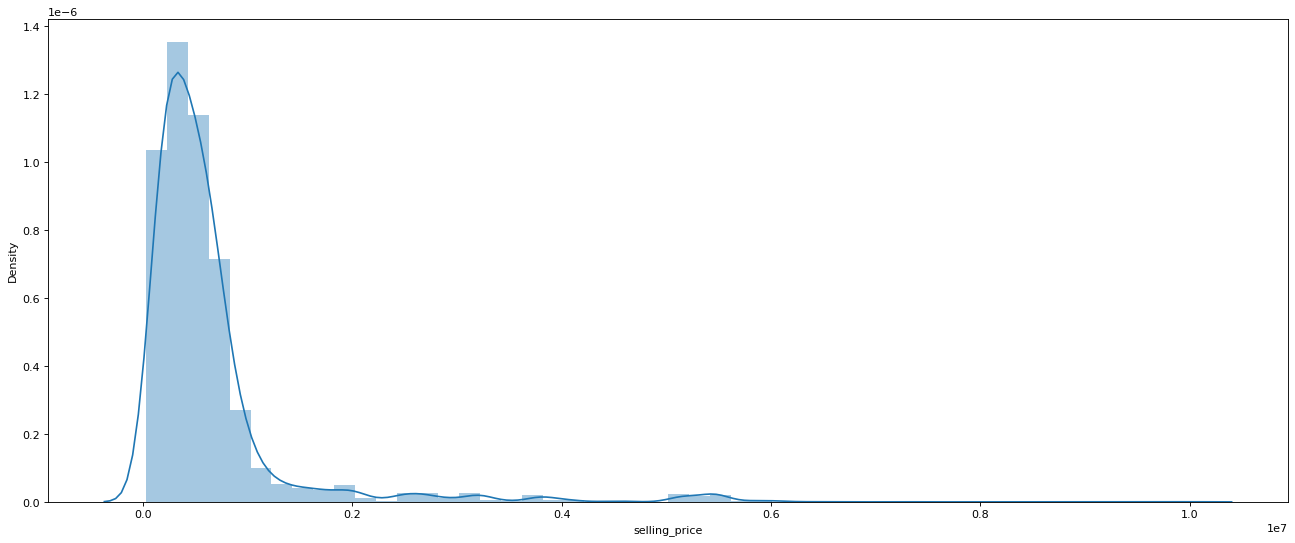

In [33]:
## Car Price Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['selling_price'])
plt.show()

In [34]:
price_bin = [0, 100000, 300000, 500000, 700000, 900000, df['selling_price'].max()]
price_label = ['Less Than 100K', '100-300K', '300-500K', '500-700K', '700-900K', 'More Than 900K']

df['price_group'] = pd.cut(df['selling_price'], bins = price_bin, labels = price_label)

#### Adding Features Car Age

In [35]:
## Create House Age Column for Further Analysis
df['car_age'] = 2020 - df['year']

#### Recategorize Car Age

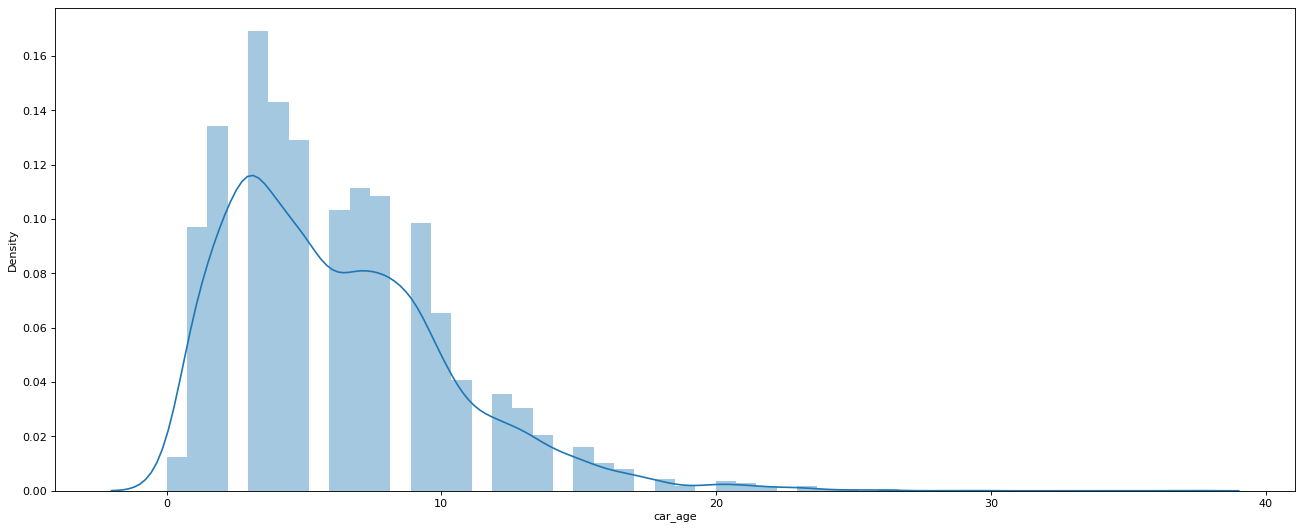

In [36]:
## Car Age Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['car_age'])
plt.show()

In [37]:
age_bin = [-1, 1, 3, 5, 10, 15, 20, df['car_age'].max()]
age_label = ['Less Than 1 Years', '1-3 Years', '3-5 Years', '5-10 Year','10-15 Years','15-20 Years', 'More Than 20 Years']

df['age_group'] = pd.cut(df['car_age'], bins = age_bin, labels = age_label)

#### Binning Km Driven

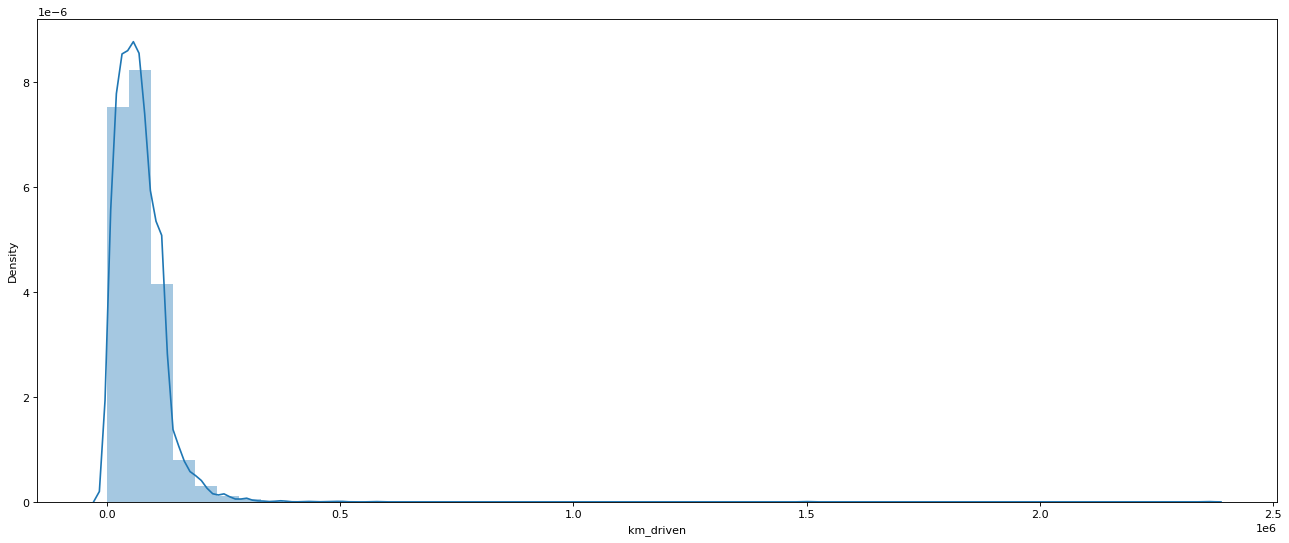

In [38]:
## Km Driven Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['km_driven'])
plt.show()

In [39]:
km_bin = [0, 1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, df['km_driven'].max()]
km_label = ['Less Than 1K', '1-10K', '10-20K', '20-30K','30-40K','40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K', '100-200K', '200-300K', '300-400K', '400-500K', '500-600K', 'More Than 600K']

df['km_group'] = pd.cut(df['km_driven'], bins = km_bin, labels = km_label)

#### Binning Engine

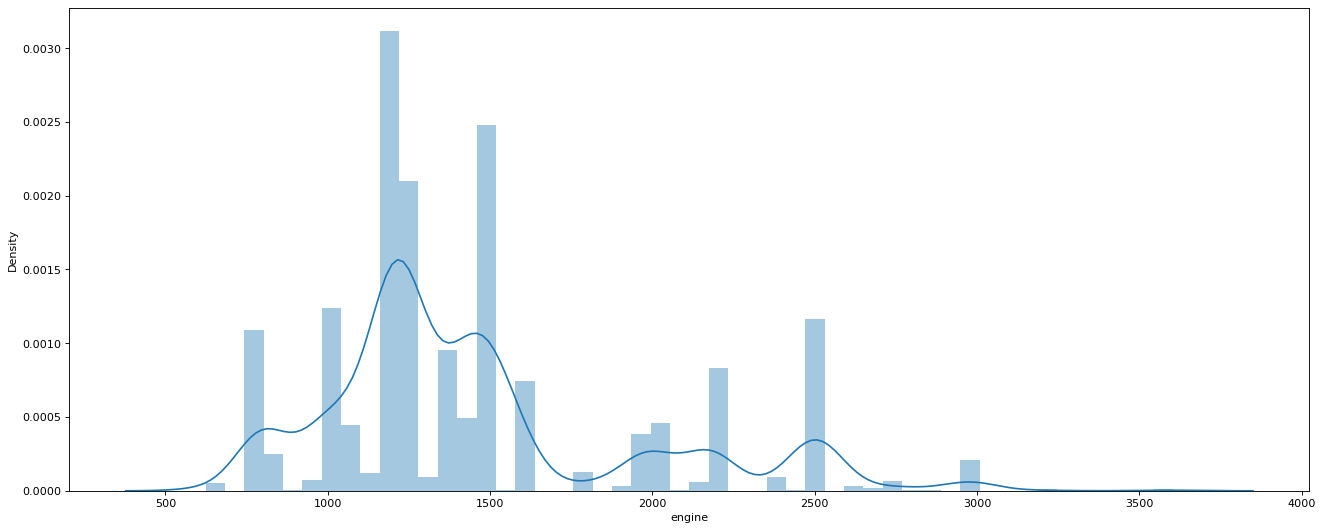

In [40]:
#### Engine Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['engine'])
plt.show()

In [41]:
df['engine'].min()

624.0

In [42]:
engine_bin = [500, 1000, 1500, 2000, 2500, 3000, df['engine'].max()]
engine_label = ['500-1000CC', '1000-1500CC', '1500-2000CC','2000-2500CC','2500-3000CC', 'More Than 3000CC']

df['engine_group'] = pd.cut(df['engine'], bins = engine_bin, labels = engine_label)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,price_group,car_age,age_group,km_group,engine_group
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,"12.7@ 2,700(kgm@ rpm)",5.00,100-300K,14,10-15 Years,100-200K,1000-1500CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00,100-300K,10,5-10 Year,100-200K,1000-1500CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00,100-300K,13,10-15 Years,100-200K,1000-1500CC


In [43]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           222
seats              0
price_group        0
car_age            0
age_group          0
km_group           0
engine_group       0
dtype: int64

In [44]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,price_group,car_age,age_group,km_group,engine_group
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,"12.7@ 2,700(kgm@ rpm)",5.00,100-300K,14,10-15 Years,100-200K,1000-1500CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00,100-300K,10,5-10 Year,100-200K,1000-1500CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00,100-300K,13,10-15 Years,100-200K,1000-1500CC


# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

##### Initial Hypothesis 
- Car Age affect price of car 
- Km Driven affect price of car
- Fuel Type affect price of car
- Seller Type affect price of car
- Transmission affect price of car
- Owner affect price of car
- Engine Capacity affect price of car
- Max Power has same effect with Engine Capacity
- Mileage has same effect with km_driven
- Seats affect price of car

### CORELLATION ANALYSIS

In [45]:
round(df.corr(),2)

,year,selling_price,km_driven,mileage,engine,max_power,seats,car_age
year,1.00,0.41,-0.42,0.31,0.02,0.21,0.01,-1.00
selling_price,0.41,1.00,-0.23,-0.13,0.45,0.75,0.05,-0.41
km_driven,-0.42,-0.23,1.00,-0.17,0.20,-0.04,0.22,0.42
mileage,0.31,-0.13,-0.17,1.00,-0.58,-0.37,-0.45,-0.31
engine,0.02,0.45,0.20,-0.58,1.00,0.70,0.61,-0.02
max_power,0.21,0.75,-0.04,-0.37,0.70,1.00,0.19,-0.21
seats,0.01,0.05,0.22,-0.45,0.61,0.19,1.00,-0.01
car_age,-1.00,-0.41,0.42,-0.31,-0.02,-0.21,-0.01,1.00


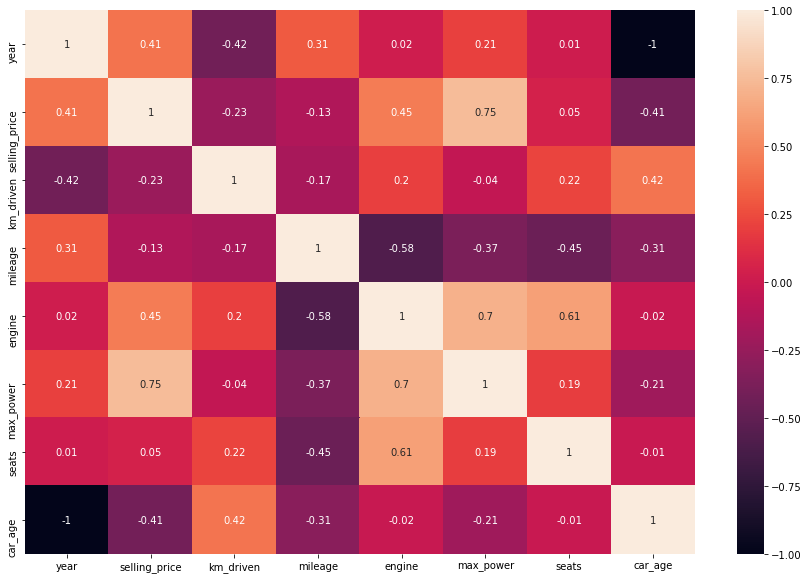

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

In [47]:
## To ensure corelation, further analysis will be conducted

### UNIVARIATE ANALYSIS

#### Price

In [48]:
df['price_group'].value_counts()

100-300K          2257
300-500K          2006
500-700K          1684
More Than 900K    1021
700-900K           784
Less Than 100K     376
Name: price_group, dtype: int64

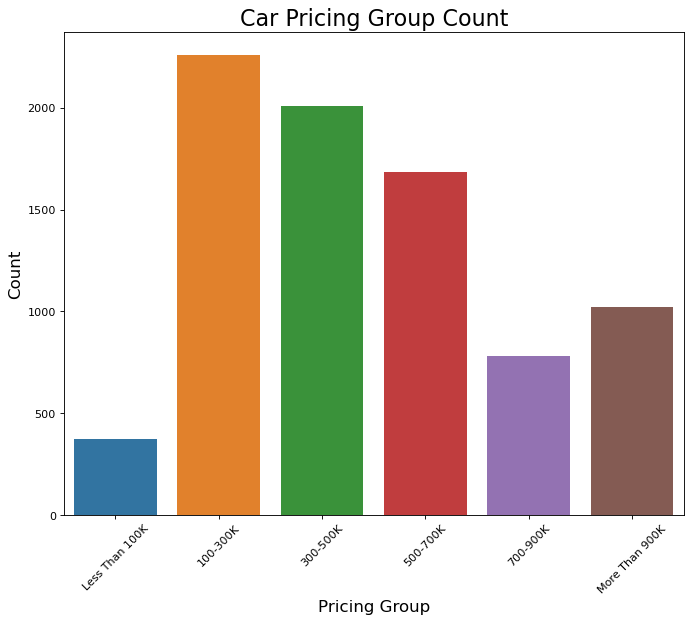

In [49]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['price_group'])
plt.title('Car Pricing Group Count', size =20)
plt.xlabel("Pricing Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority car are sold in range price 100,000 - 300,000

#### Age Group

In [50]:
df['age_group'].value_counts()

5-10 Year             2928
1-3 Years             1825
3-5 Years             1635
10-15 Years            864
Less Than 1 Years      657
15-20 Years            170
More Than 20 Years      49
Name: age_group, dtype: int64

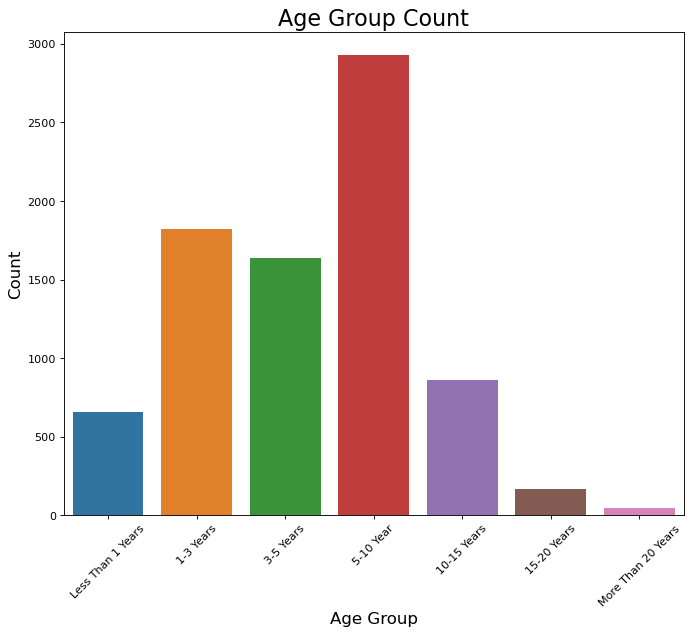

In [51]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['age_group'])
plt.title('Age Group Count', size =20)
plt.xlabel("Age Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority car are sold in range 5 - 10 years

In [52]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,price_group,car_age,age_group,km_group,engine_group
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,"12.7@ 2,700(kgm@ rpm)",5.00,100-300K,14,10-15 Years,100-200K,1000-1500CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00,100-300K,10,5-10 Year,100-200K,1000-1500CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00,100-300K,13,10-15 Years,100-200K,1000-1500CC


#### km_driven Group

In [53]:
df['km_group'].value_counts()

100-200K          1547
50-60K             766
30-40K             764
60-70K             730
40-50K             702
20-30K             700
70-80K             674
10-20K             619
1-10K              553
80-90K             475
90-100K            466
200-300K           107
300-400K            10
Less Than 1K         7
400-500K             5
More Than 600K       2
500-600K             1
Name: km_group, dtype: int64

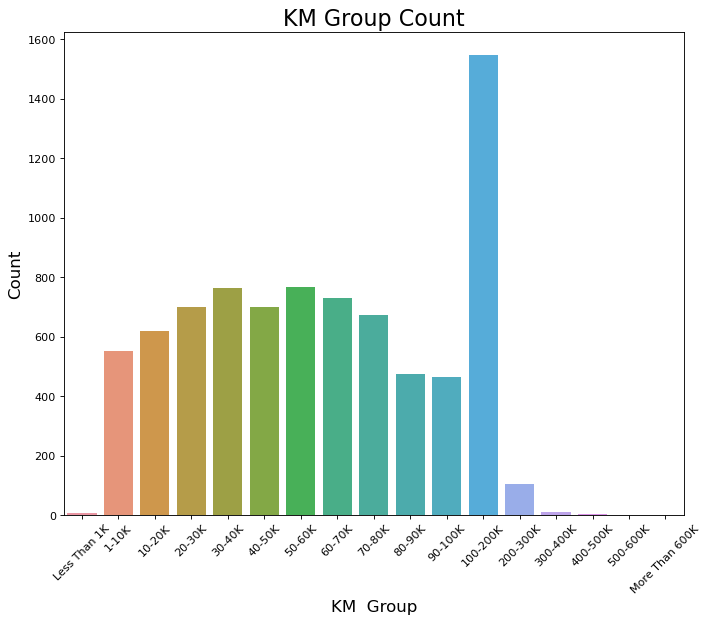

In [54]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['km_group'])
plt.title('KM Group Count', size =20)
plt.xlabel("KM  Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority car are sold in range km 100,000 - 200,000

In [55]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,price_group,car_age,age_group,km_group,engine_group
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,190Nm@ 2000rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,250Nm@ 1500-2500rpm,5.00,300-500K,6,5-10 Year,100-200K,1000-1500CC
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,"12.7@ 2,700(kgm@ rpm)",5.00,100-300K,14,10-15 Years,100-200K,1000-1500CC
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,22.4 kgm at 1750-2750rpm,5.00,100-300K,10,5-10 Year,100-200K,1000-1500CC
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,"11.5@ 4,500(kgm@ rpm)",5.00,100-300K,13,10-15 Years,100-200K,1000-1500CC


#### Fuels

In [56]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

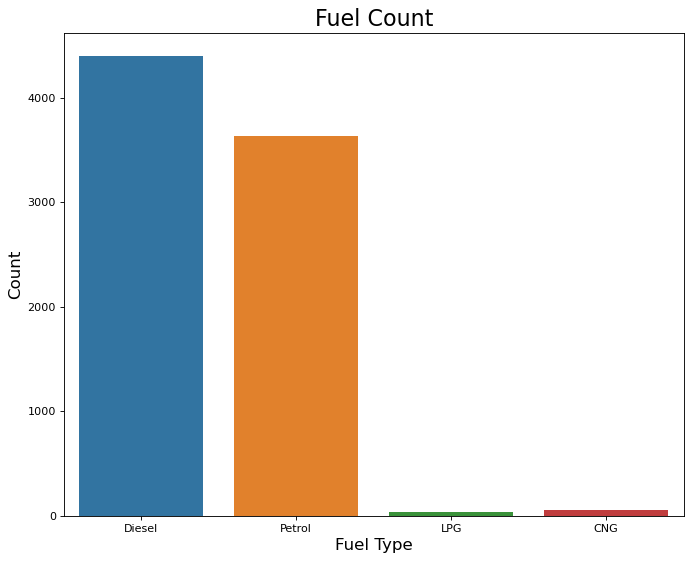

In [57]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['fuel'])
plt.title('Fuel Count', size =20)
plt.xlabel("Fuel Type",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority car are sold is Diesel Fuel

#### Seller Type

In [58]:
df['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

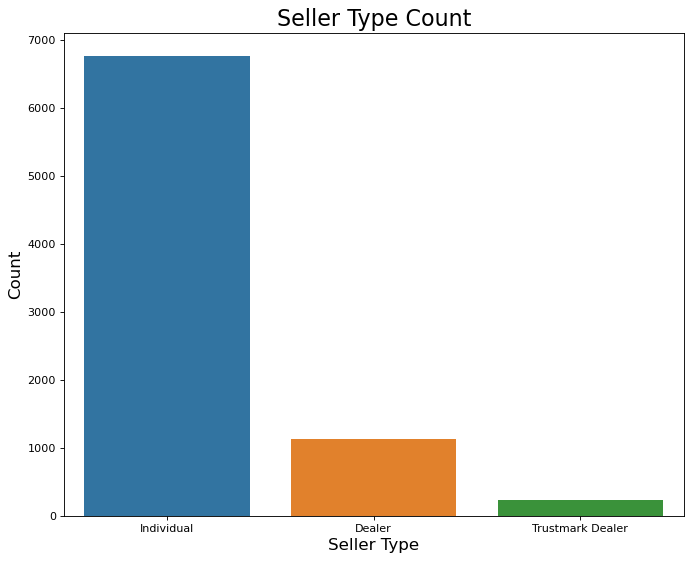

In [59]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['seller_type'])
plt.title('Seller Type Count', size =20)
plt.xlabel("Seller Type",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority car seller are individual

#### Transmission

In [60]:
df['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

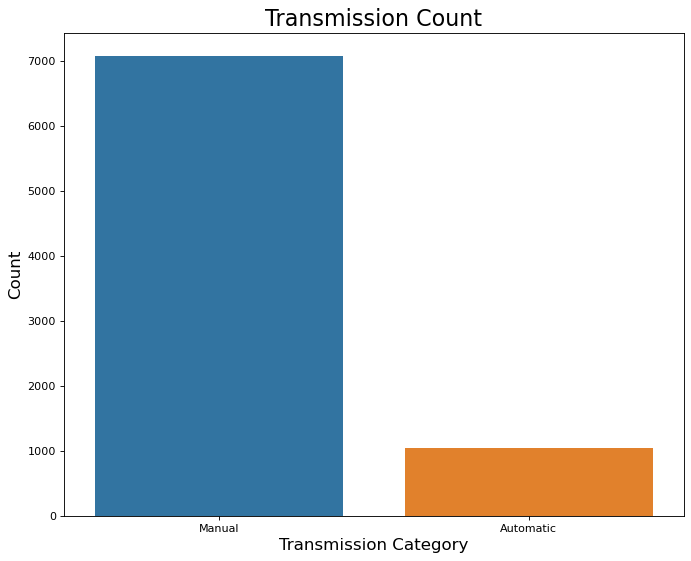

In [61]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['transmission'])
plt.title('Transmission Count', size =20)
plt.xlabel("Transmission Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority car are sold are in Manual Transmission

#### Owner

In [62]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

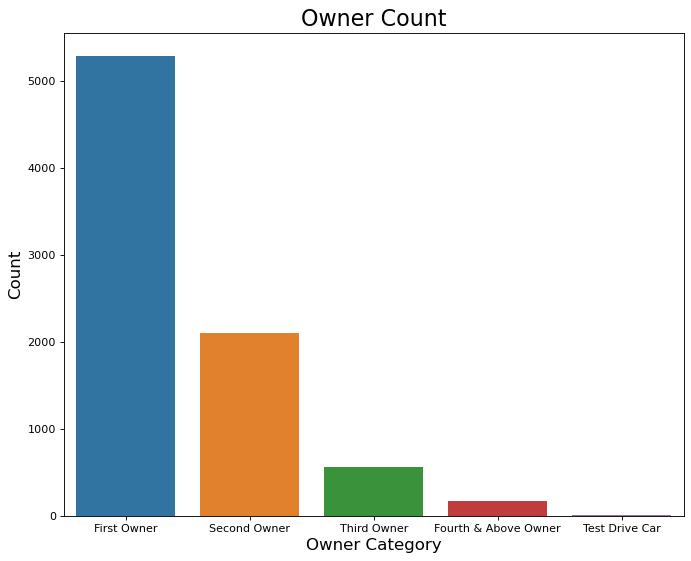

In [63]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['owner'])
plt.title('Owner Count', size =20)
plt.xlabel("Owner Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority car seller are first owner

#### Engine Group

In [64]:
df['engine_group'].value_counts()

1000-1500CC         4751
500-1000CC          1313
1500-2000CC          851
2000-2500CC          847
2500-3000CC          354
More Than 3000CC      12
Name: engine_group, dtype: int64

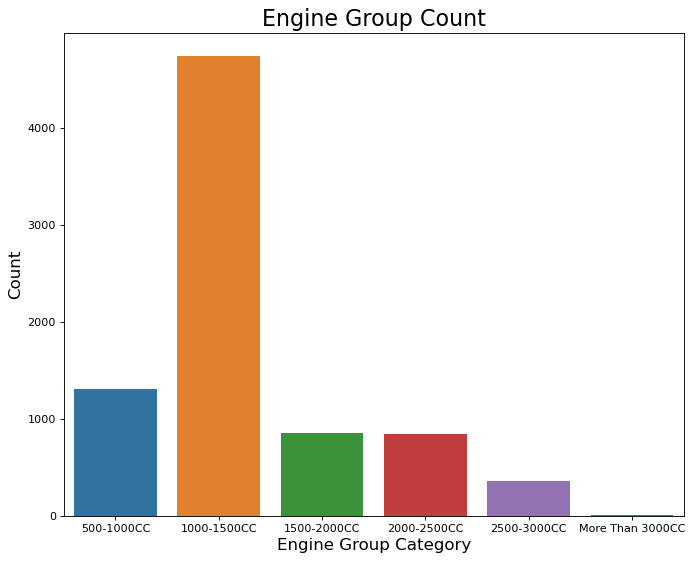

In [65]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['engine_group'])
plt.title('Engine Group Count', size =20)
plt.xlabel("Engine Group Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority car sold are in 1000-1500 cc Engine

#### Seats

In [66]:
df['seats'].value_counts()

5.00     6475
7.00     1120
8.00      236
4.00      133
9.00       80
6.00       62
10.00      19
2.00        2
14.00       1
Name: seats, dtype: int64

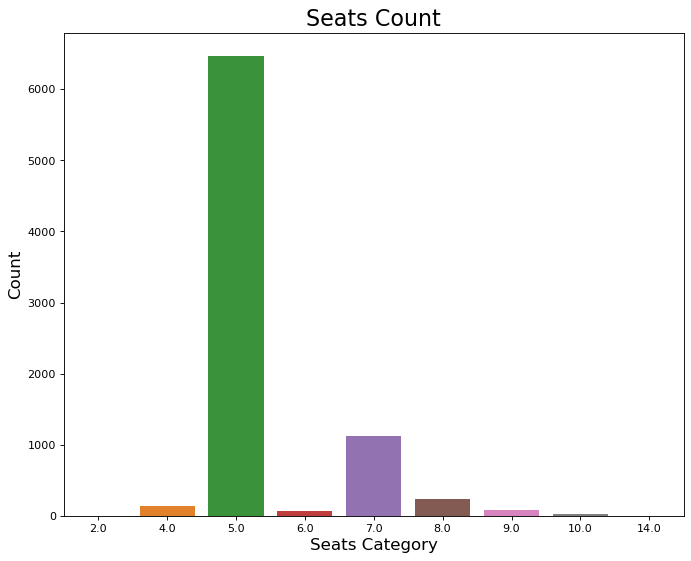

In [67]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['seats'])
plt.title('Seats Count', size =20)
plt.xlabel("Seats Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority car sold are 5 seaters

### MULTIVARIATE ANALYSIS

#### Car Age VS Price

In [69]:
df_carage = df.pivot_table(index='age_group', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_carage

,age_group,selling_price
0,Less Than 1 Years,1676549.44
1,1-3 Years,919546.82
2,3-5 Years,650867.85
3,5-10 Year,394964.43
4,10-15 Years,192875.67
5,15-20 Years,98652.64
6,More Than 20 Years,85040.80


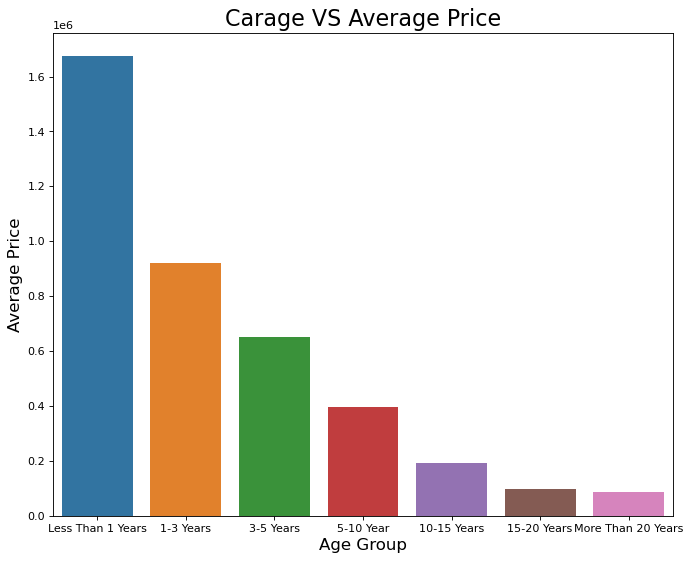

In [70]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'age_group' , y = 'selling_price', data = df_carage, estimator=sum)
plt.title('Carage VS Average Price', size =20)
plt.xlabel("Age Group",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Car Age have negative impact to a Car price

#### Km Driven VS Average Price

In [72]:
df_kmdriven = df.pivot_table(index='km_group', values='selling_price', aggfunc='median').sort_values('selling_price', ascending=False).reset_index()
df_kmdriven

,km_group,selling_price
0,1-10K,700000
1,10-20K,645000
2,20-30K,550000
3,More Than 600K,525000
4,30-40K,525000
5,Less Than 1K,500000
6,40-50K,472500
7,50-60K,425000
8,300-400K,425000
9,60-70K,420000


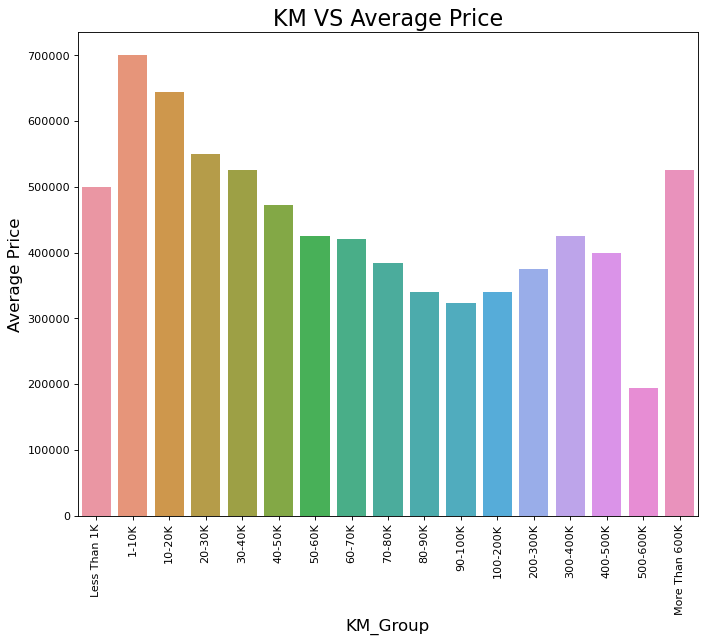

In [73]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'km_group' , y = 'selling_price', data = df_kmdriven, estimator=sum)
plt.title('KM VS Average Price', size =20)
plt.xlabel("KM_Group",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

In [74]:
df[df['km_driven'] < 1000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,price_group,car_age,age_group,km_group,engine_group
7913,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.10,1196.00,73.00,101Nm@ 3000rpm,5.00,100-300K,9,5-10 Year,Less Than 1K,1000-1500CC


- Number of km driven have negative impact to a Car price

#### Seat VS Average Price

In [75]:
df_seat = df.pivot_table(index='seats', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_seat

,seats,selling_price
0,7.00,812923.18
1,2.00,700500.00
2,5.00,616318.86
3,8.00,583711.83
4,6.00,581596.77
5,9.00,500074.94
6,4.00,486764.66
7,10.00,344105.11
8,14.00,235000.00


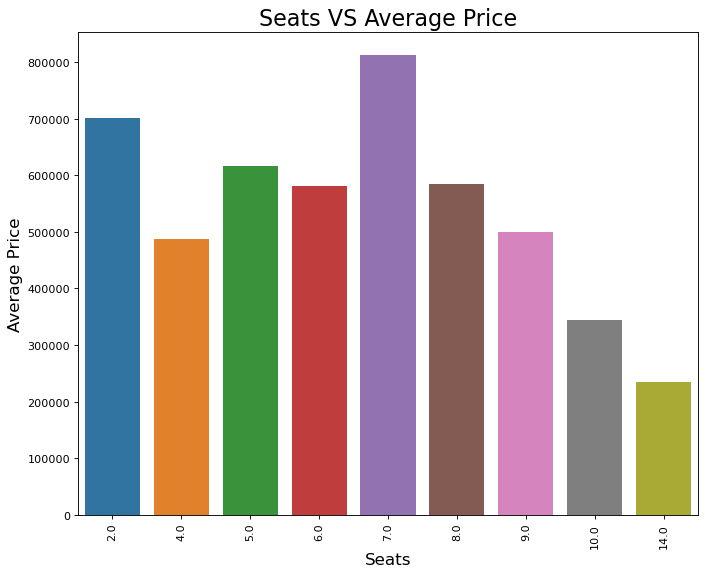

In [76]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'seats' , y = 'selling_price', data = df_seat, estimator=sum)
plt.title('Seats VS Average Price', size =20)
plt.xlabel("Seats",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Seats have low impact to car price

#### Fuel VS Average Price

In [77]:
df_fuel = df.pivot_table(index='fuel', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_fuel

,fuel,selling_price
0,Diesel,791452.92
1,Petrol,462441.06
2,CNG,301017.49
3,LPG,200421.05


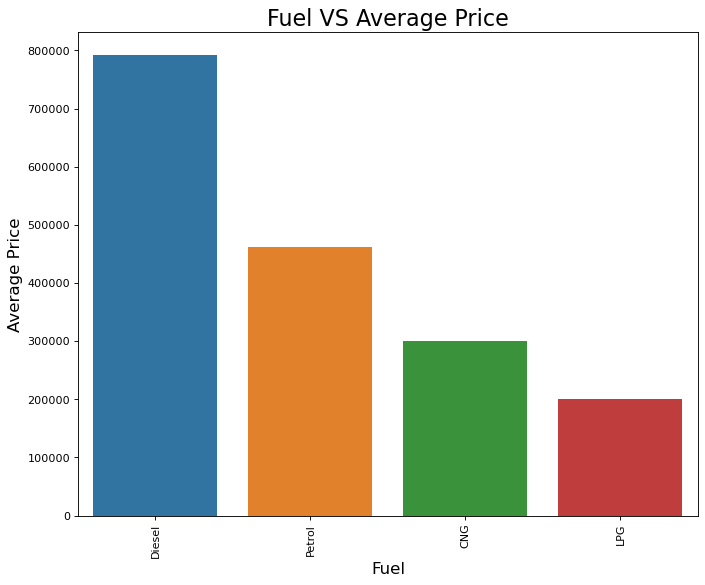

In [78]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'fuel' , y = 'selling_price', data = df_fuel, estimator=sum)
plt.title('Fuel VS Average Price', size =20)
plt.xlabel("Fuel",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Cars with Diesel engine have higher average price

#### Transimission VS Average Price

In [80]:
df_transmission = df.pivot_table(index='transmission', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_transmission

,transmission,selling_price
0,Automatic,1870827.60
1,Manual,455425.86


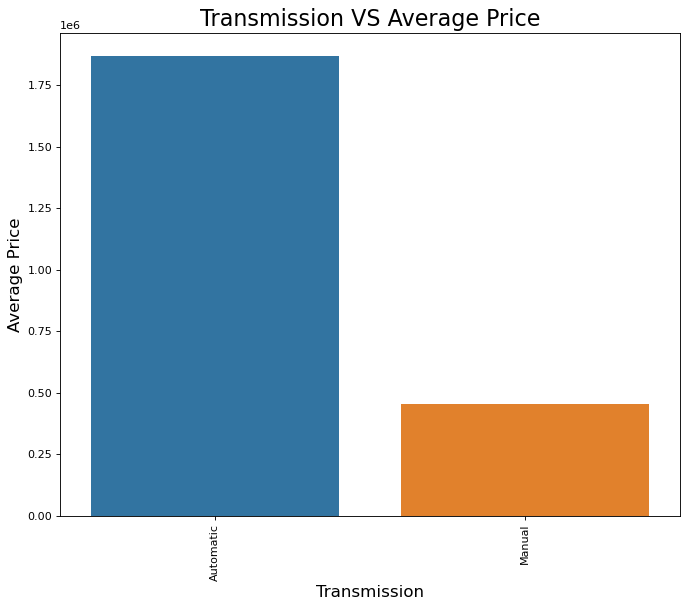

In [81]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'transmission' , y = 'selling_price', data = df_transmission, estimator=sum)
plt.title('Transmission VS Average Price', size =20)
plt.xlabel("Transmission",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Cars with Automatic Transmission have higher average price

#### Engine vs Average Price

In [82]:
df_engine = df.pivot_table(index='engine_group', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_engine

,engine_group,selling_price
0,More Than 3000CC,3306666.67
1,1500-2000CC,1579755.55
2,2500-3000CC,1069358.73
3,2000-2500CC,1026513.54
4,1000-1500CC,472268.02
5,500-1000CC,237673.99


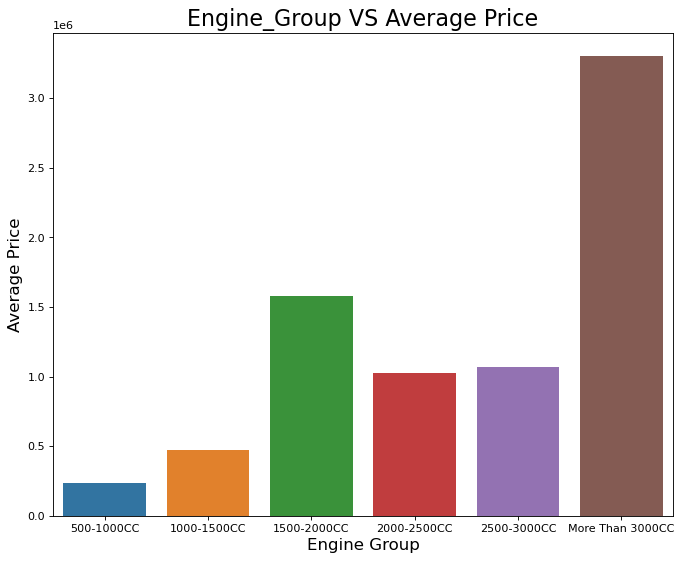

In [83]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'engine_group' , y = 'selling_price', data = df_engine, estimator=sum)
plt.title('Engine_Group VS Average Price', size =20)
plt.xlabel("Engine Group",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Engine group have low positive impact to a Car price

#### Owner vs Average Price

In [84]:
df_owner = df.pivot_table(index='owner', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_owner

,owner,selling_price
0,Test Drive Car,4403800.00
1,First Owner,783086.41
2,Second Owner,392964.47
3,Third Owner,284015.33
4,Fourth & Above Owner,225813.17


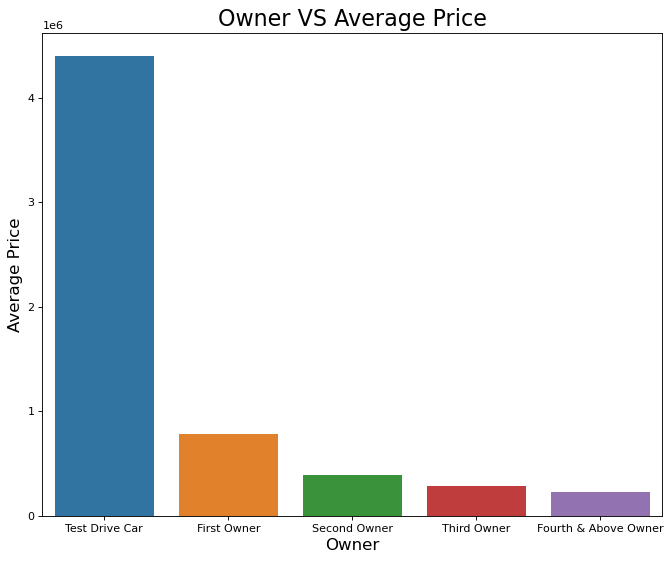

In [85]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'owner' , y = 'selling_price', data = df_owner, estimator=sum)
plt.title('Owner VS Average Price', size =20)
plt.xlabel("Owner",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Owner Type have an impact on car price (Car price decrease the more it get sold)

#### Seller Type vs Average Price

In [86]:
df_sellertype = df.pivot_table(index='seller_type', values='selling_price', aggfunc='mean').sort_values('selling_price', ascending=False).reset_index()
df_sellertype

,seller_type,selling_price
0,Dealer,1443493.75
1,Trustmark Dealer,801838.98
2,Individual,498561.23


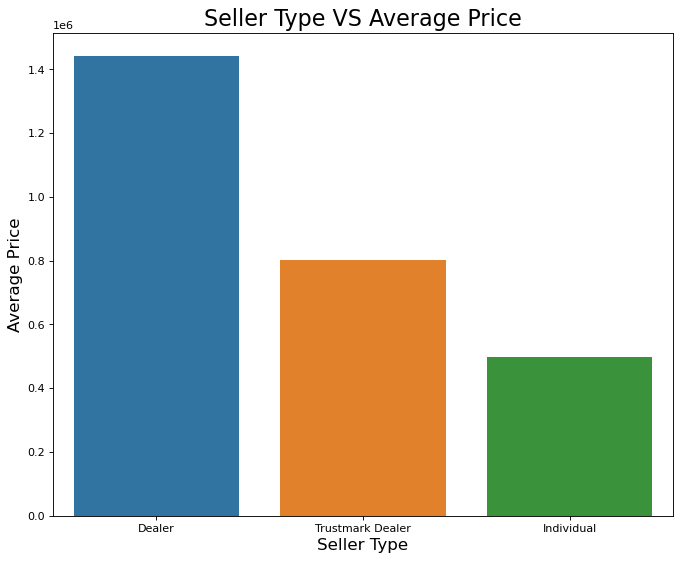

In [87]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'seller_type' , y = 'selling_price', data = df_sellertype, estimator=sum)
plt.title('Seller Type VS Average Price', size =20)
plt.xlabel("Seller Type",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Dealer sell car in higher price than individual seller

#### Engine Group vs Max Power

In [89]:
df_engine2 = df.pivot_table(index='engine_group', values='max_power', aggfunc='mean').sort_values('max_power', ascending=False).reset_index()
df_engine2

,engine_group,max_power
0,More Than 3000CC,244.75
1,1500-2000CC,140.26
2,2000-2500CC,131.45
3,2500-3000CC,112.36
4,1000-1500CC,83.61
5,500-1000CC,56.16


- Engine has the same impact with max_power --> one of this features might be droped on machine learning models

# DATA INSIGHT

- Majority car are sold in range price 100,000 - 300,000
- Majority car are sold in range 5 - 10 years
- Majority car are sold in range km 100,000 - 200,000
- Majority car are sold is Diesel Fuel
- Majority car seller are individual
- Majority car are sold are in Manual Transmission
- Majority car seller are first owner
- Majority car sold are in 1000-1500 cc Engine
- Majority car sold are 5 seaters
- Car Age have negative impact to a Car price
- Number of km driven have negative impact to a Car price
- Seats have low impact to car price
- Cars with Diesel engine have higher average price
- Cars with Automatic Transmission have higher average price
- Engine group have low positive impact to a Car price
- Owner Type have an impact on car price (Car price decrease the more it get sold)
- Dealer sell car in higher price than individual seller
- Engine has the same impact with max_power --> one of this features might be droped on machine learning models

# SUMMARY & RECOMMENDATION

For Machine Learning
- Remove seats from features
- Remove one of Engine or max_power from features